**Data Loading**
--
Using MNIST dataset from keras dataset library

In [69]:
import numpy as np
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = mnist.load_data()

Reshaping the image array, for it to work with numpy. And then, normalizing the values to be between 0 and 1.

In [70]:
X_train = X_train.reshape(X_train.shape[0], -1)/255.
X_test = X_test.reshape(X_test.shape[0], -1)/255.

In [71]:
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

**Parameters**
--
Initializing parameters based on the size of image, hidden layer and output layer. It is a two-layer neural network, hence four parameters. The weights are initialized using 'He (Kaiming)' scaling technique - *np.sqrt(2 / input_size)*. It prevents gradient explosion or vanishing for ReLU activation.

In [72]:
def params_init(input_size, hidden_size, output_size):
    W1 = np.random.randn(input_size, hidden_size) * np.sqrt(2 / input_size)
    b1 = np.zeros((1, hidden_size))
    W2 = np.random.randn(hidden_size, output_size) * np.sqrt(2 / hidden_size)
    b2 = np.zeros((1, output_size))
    return W1,b1,W2,b2

**Activations & Forward Propagation**
--
Implementation of ReLU and Softmax activations. The max value is subtracted from all values to prevent numerical overflow during exponents calculation.

In [73]:
def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    exps = np.exp(Z - np.max(Z, axis=1, keepdims=True))
    return exps / np.sum(exps, axis=1, keepdims=True)

def forward_prop(W1, b1, W2, b2, X):
    Z1 = X@W1 + b1
    A1 = ReLU(Z1)
    Z2 = A1@W2 + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

**Activation Derivatives & Back Propagation**
--
Derivation of both ReLU and softmax is calculated, ReLU just being 0 or 1 and softmax depending upon the index, yields two different values further simplifying the overall loss to *(predicted value - true value)* or *(A2-Y)*.
Also, one hot encoding converts the labels into 0 and 1 array format to induce it into matrix calculation.

In [74]:
def ReLU_deriv(Z):
    return (Z > 0).astype(float)

def one_hot(Y, num_classes):
    return np.eye(num_classes)[Y]

def backward_prop(Z1, A1, A2, W2, X, Y):
    m = X.shape[0]

    dZ2 = A2 - Y 
    dW2 = A1.T @ dZ2 / m
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m
    
    dA1 = dZ2 @ W2.T
    dZ1 = dA1 * ReLU_deriv(Z1)
    dW1 = X.T @ dZ1 / m
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m
    
    return dW1, db1, dW2, db2
    

**Updating Parameters**
--

In [75]:
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, lr):
    W1 -= lr * dW1
    b1 -= lr * db1
    W2 -= lr * dW2
    b2 -= lr * db2

    return W1, b1, W2, b2

**Predictions, Accuracy & Loss**
--

In [76]:
def get_predictions(W1, b1, W2, b2, X):
    _,_,_,A2 = forward_prop(W1, b1, W2, b2, X)
    return np.argmax(A2, axis=1)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y)/Y.size

def compute_loss(Y_hat, Y):
        m = Y.shape[0]
        return -np.sum(Y * np.log(Y_hat + 1e-8)) / m

**Training Loop**
--

In [77]:
epochs = 10
batch_size = 1024
y_train_oh = one_hot(y_train, 10)

W1, b1, W2, b2 = params_init(input_size = 784, hidden_size = 128, output_size = 10)
for epoch in range(epochs):
    permutation = np.random.permutation(len(X_train))
    X_train_shuffled = X_train[permutation]
    y_train_shuffled = y_train_oh[permutation]
    
    for i in range(0, len(X_train), batch_size):
        X_batch = X_train_shuffled[i:i+batch_size]
        y_batch = y_train_shuffled[i:i+batch_size]

        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X_batch)
        loss = compute_loss(A2, y_batch)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, A2, W2, X_batch, y_batch)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, lr=0.1)
        
    test_preds = get_predictions(W1, b1, W2, b2, X_test)
    acc = get_accuracy(test_preds, y_test)
    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss:.4f}, Test Accuracy: {acc:.4f}")

[7 2 1 ... 4 8 6] [7 2 1 ... 4 5 6]
Epoch 1/10, Loss: 0.6255, Test Accuracy: 0.8653
[7 2 1 ... 4 5 6] [7 2 1 ... 4 5 6]
Epoch 2/10, Loss: 0.4754, Test Accuracy: 0.8934
[7 2 1 ... 4 5 6] [7 2 1 ... 4 5 6]
Epoch 3/10, Loss: 0.3156, Test Accuracy: 0.9030
[7 2 1 ... 4 5 6] [7 2 1 ... 4 5 6]
Epoch 4/10, Loss: 0.3704, Test Accuracy: 0.9097
[7 2 1 ... 4 5 6] [7 2 1 ... 4 5 6]
Epoch 5/10, Loss: 0.2743, Test Accuracy: 0.9154
[7 2 1 ... 4 5 6] [7 2 1 ... 4 5 6]
Epoch 6/10, Loss: 0.2916, Test Accuracy: 0.9180
[7 2 1 ... 4 5 6] [7 2 1 ... 4 5 6]
Epoch 7/10, Loss: 0.3107, Test Accuracy: 0.9219
[7 2 1 ... 4 5 6] [7 2 1 ... 4 5 6]
Epoch 8/10, Loss: 0.2961, Test Accuracy: 0.9257
[7 2 1 ... 4 5 6] [7 2 1 ... 4 5 6]
Epoch 9/10, Loss: 0.2758, Test Accuracy: 0.9261
[7 2 1 ... 4 5 6] [7 2 1 ... 4 5 6]
Epoch 10/10, Loss: 0.3030, Test Accuracy: 0.9274


**Testing Predictions**
--

In [78]:
def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[index,:]
    prediction = get_predictions(W1, b1, W2, b2, current_image)
    label = y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [3]
Label:  3


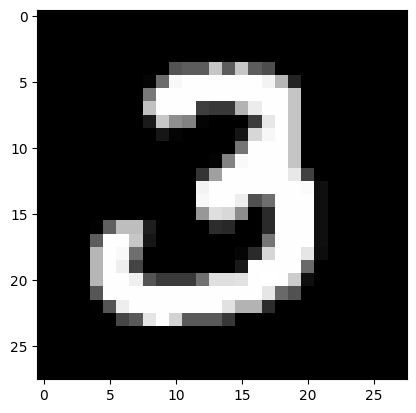

In [79]:
test_prediction(242, W1, b1, W2, b2)